In [49]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(tf.__version__)

2.1.0


In [8]:
# READ Data Set
bankdf=pd.read_csv("bank.csv")
bankdf.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
# Drop the columns which are unique for all users like IDs (2.5 points)
bankdf.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
bankdf.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [11]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
# treat gender and geography to 1-hot-encode 
bankdf['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
bankdf['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
bankdf_encoded=pd.get_dummies(bankdf,drop_first=True)

In [15]:
bankdf_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [16]:
bankdf_encoded.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00


/Volumes/Activeai-drive/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Volumes/Activeai-drive/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


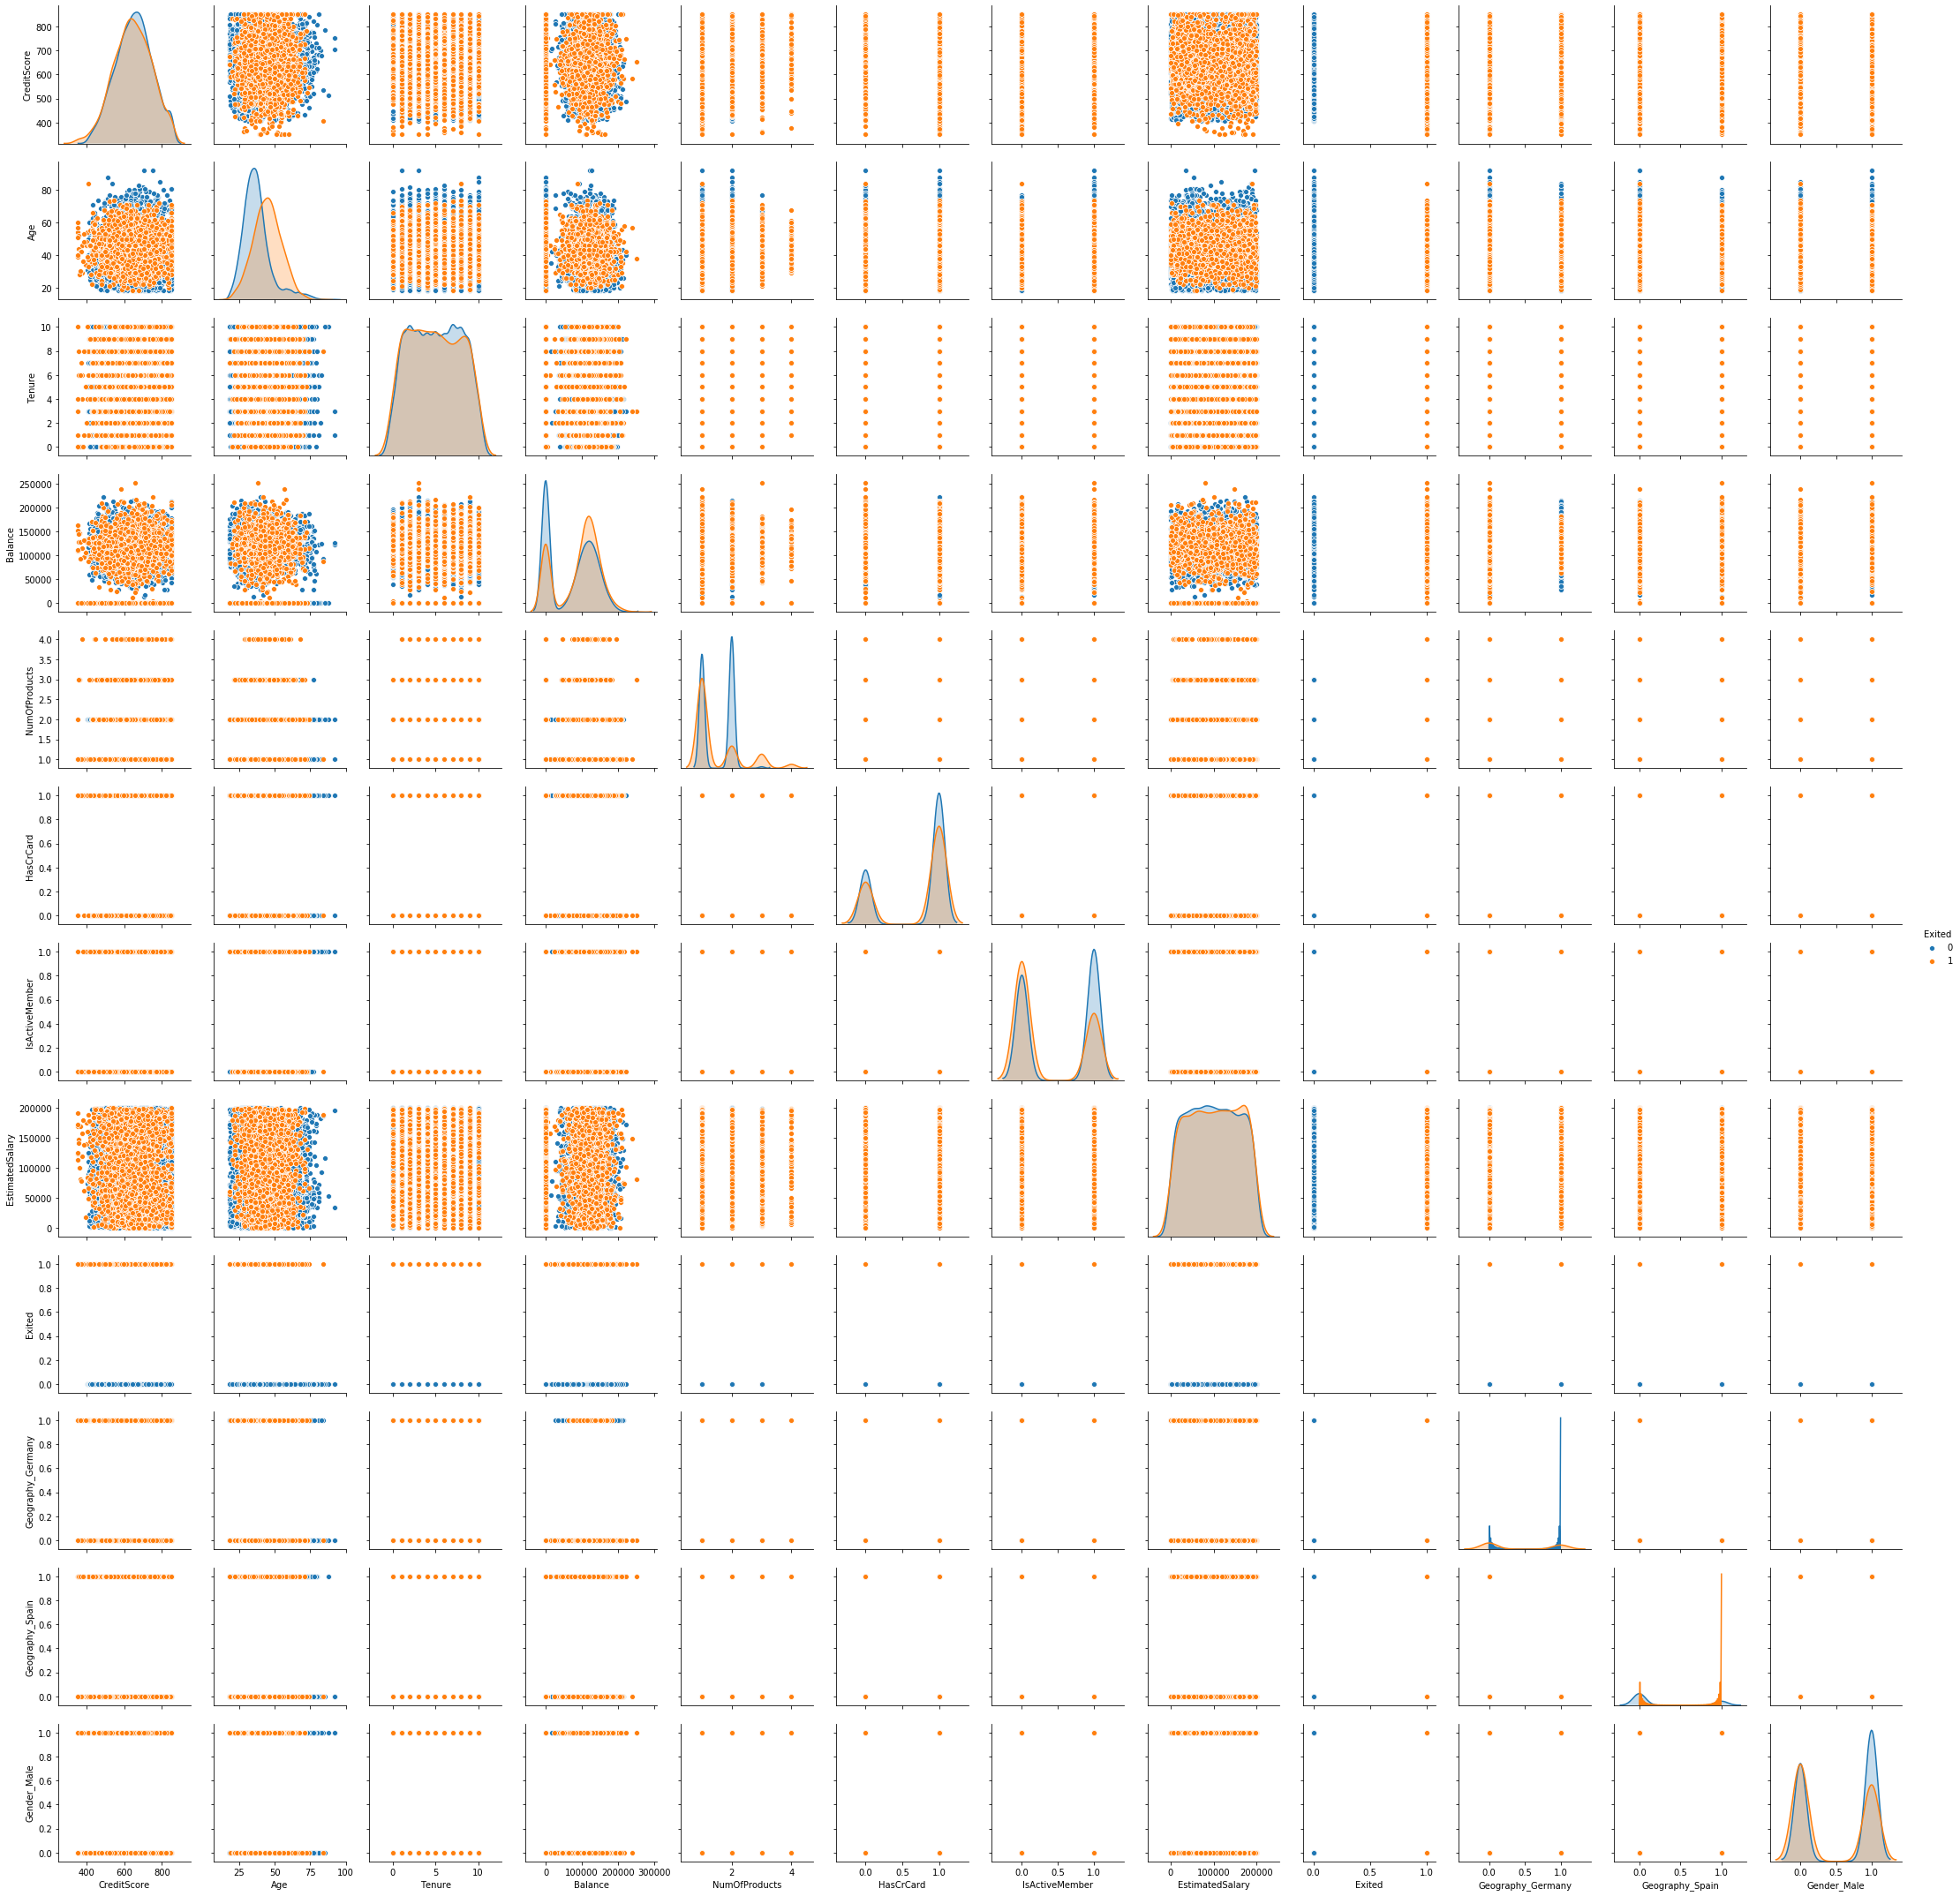

In [18]:
sns.pairplot(data=bankdf_encoded, hue='Exited')

In [19]:
# Distinguish the feature and target set (2.5 points)
feature_set = bankdf_encoded.drop('Exited',axis=1)
target_set = bankdf_encoded['Exited'].copy()

In [22]:
# Distinguish the feature and target set (2.5 points)
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.25, random_state=1435)

In [24]:
# Normalize the train and test data (5 points)
# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train_scaled = scaler.transform(X_train)
# Scale the test set
X_test_scaled = scaler.transform(X_test)

In [36]:
# Initialize & build the model (10 points)

model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [37]:
# Predict and print cofusion matrix 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model)
print(model.optimizer)
print(model.loss)
print(model.metrics_names)

binary_crossentropy
['loss', 'accuracy']


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train_scaled, y_train,epochs=10, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/10
7500/7500 [==============================] - 31s 4ms/sample - loss: 0.8494 - accuracy: 0.7897
Epoch 2/10
7500/7500 [==============================] - 27s 4ms/sample - loss: 0.4396 - accuracy: 0.8231
Epoch 3/10
7500/7500 [==============================] - 32s 4ms/sample - loss: 0.4069 - accuracy: 0.8381
Epoch 4/10
7500/7500 [==============================] - 29s 4ms/sample - loss: 0.3953 - accuracy: 0.8507
Epoch 5/10
7500/7500 [==============================] - 28s 4ms/sample - loss: 0.3916 - accuracy: 0.8559
Epoch 6/10
7500/7500 [==============================] - 31s 4ms/sample - loss: 0.4043 - accuracy: 0.8488
Epoch 7/10
7500/7500 [==============================] - 32s 4ms/sample - loss: 0.3872 - accuracy: 0.8583
Epoch 8/10
7500/7500 [==============================] - 33s 4ms/sample - loss: 0.3939 - accuracy: 0.8584
Epoch 9/10
7500/7500 [==============================] - 33s 4ms/sample - loss: 0.3812 - accuracy: 0.8564
Epoch 10/10
7500/7500 [==========

In [40]:
predictions = np.round(model.predict(X_test_scaled))
score = model.evaluate(X_test_scaled, y_test,verbose=1)

print(score)

2500/2500 [==============================] - 0s 173us/sample - loss: 0.4457 - accuracy: 0.8556
[0.44566273732185363, 0.8556]


In [45]:
print(pd.DataFrame(metrics.confusion_matrix(y_test, predictions, labels=[0 ,1]), index=['true-0', 'true-1'], columns=['pred-0', 'pred-1']))

        pred-0  pred-1
true-0    1866      89
true-1     272     225


In [48]:
print(recall_score(y_test, predictions, average='macro'))
print(precision_score(y_test,predictions, average='macro'))

0.34182993500551395
0.3973347017571038


/Volumes/Activeai-drive/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


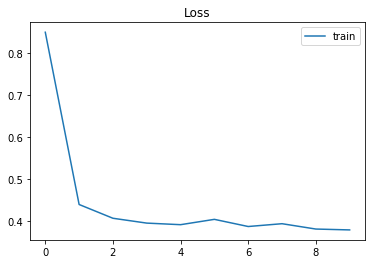

In [52]:
# plot loss during training
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

In [ ]:
# model tuning with higher epocs, different optmizers and activation function i.e hyper param would have been 
# ideal means to conclude this.